In [189]:
import json
import os
from typing import List

from matplotlib import pyplot as plt

MODEL_IDS_24_H: List[str] = [
    'LinearRegression2022_02_08_15_40_14_910282',
    'SimpleNeuralNet2022_02_08_12_56_24_635436',
    'SimpleNeuralNet2022_02_08_12_54_17_470056',
    'TimeSeriesTransformer2022_02_07_21_41_35_195139',
    # 'TimeSeriesTransformer2022_02_08_00_14_35_897198',
    # 'TimeSeriesTransformer2022_02_07_23_48_05_910516',
    'TimeSeriesTransformerWithConvolutionalAttention2022_02_07_21_55_14_101949',
    # 'TimeSeriesTransformerWithConvolutionalAttention2022_02_07_22_20_04_159231',
    # 'TimeSeriesTransformerWithConvolutionalAttention2022_02_07_22_42_57_369977',
    'Informer2022_02_07_21_23_12_947796'
]
LABEL_IDS_24_H: List[str] = [
    'Linear Regression',
    'Neural Net (2 Layers a 256 Neurons)',
    'Neural Net (2 Layers a 2048 Neurons)',
    'Transformer (generative)',
    # 'Transformer (1 step ahead)',
    # 'Transformer (teacher forcing)',
    'Conv. Transformer (generative)',
    # 'Conv. Transformer (1 step ahead)',
    # 'Conv. Transformer (teacher forcing)',
    'Informer (generative)',
]

MODEL_IDS_96_H = [
    'LinearRegression2022_02_08_15_39_00_232735',
    'SimpleNeuralNet2022_02_08_14_35_01_005460',
    'SimpleNeuralNet2022_02_08_14_28_18_141791',
    'Informer2022_02_07_15_16_12_610272',
    'TimeSeriesTransformerWithConvolutionalAttention2022_02_07_15_40_27_493933',
    'TimeSeriesTransformer2022_02_07_16_20_41_921031'
]

LABEL_IDS_96_H = [
    'Linear Regression',
    'Neural Net (2 Layers a 256 Neurons)',
    'Neural Net (2 Layers a 2048 Neurons)',
    'Informer (generative)',
    'Convolutional Self-Attention Transformer (generative)',
    'Transformer (generative)',
]

MODEL_IDS_168_H = [
    'LinearRegression2022_02_08_15_37_03_540828',
    'SimpleNeuralNet2022_02_08_14_56_04_261699',
    'SimpleNeuralNet2022_02_08_15_33_07_681994',
    'Informer2022_02_07_17_50_12_116603'
]
LABEL_IDS_168_H = [
    'Linear Regression',
    'Neural Net (2 Layers a 256 Neurons)',
    'Neural Net (2 Layers a 2048 Neurons)',
    'Informer (generative)',
]

model_ids = MODEL_IDS_24_H
labels = LABEL_IDS_24_H

assert len(model_ids) == len(labels)

experiments = []
for model_id in model_ids:
    with open(os.path.join('..', 'experiments', 'final', model_id + '.json')) as file:
        experiment_data = json.load(file)
        experiments.append(experiment_data)
        print(experiment_data)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Compare the average losses

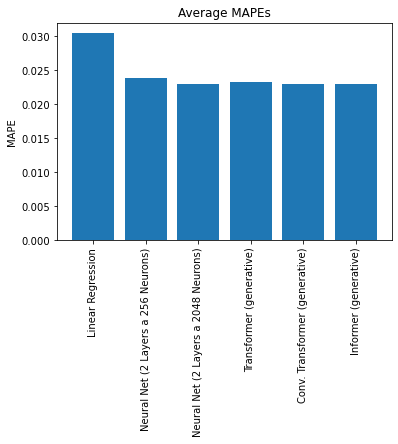

In [190]:
def create_loss_comparison_diagram(losses: List[float], title: str, bar_names: List[str], y_axis_label: str) -> None:
    """
    Creates a bar diagram which compares the losses of different models
    :param losses: the loss of each model to plot
    :param title: the name of the diagram
    :param bar_names: the name of each bar (should identify the model)
    :param y_axis_label: the name of the y axis
    """
    assert len(losses) == len(bar_names)
    plt.bar(bar_names, losses)
    plt.xticks(rotation='vertical')
    plt.ylabel(y_axis_label)
    plt.title(title)
    plt.show()


mape_losses = [experiment['evaluation']['total_mape_loss'] for experiment in experiments]
create_loss_comparison_diagram(mape_losses, 'Average MAPEs', labels, 'MAPE')

Compare the losses by prediction variable:

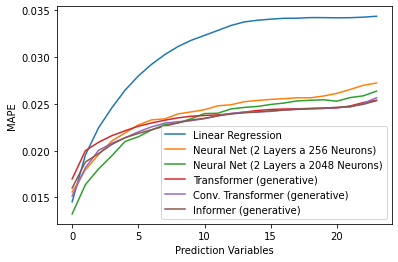

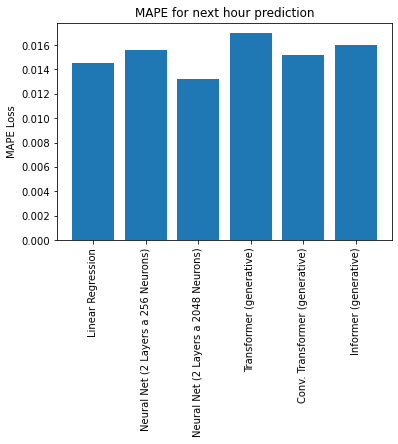

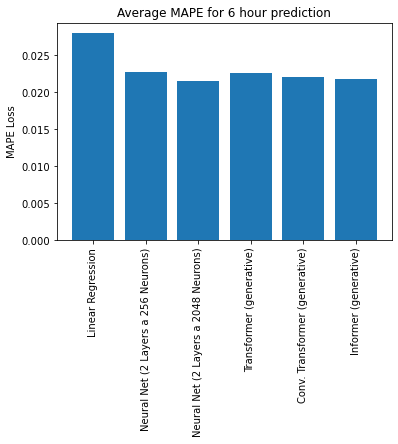

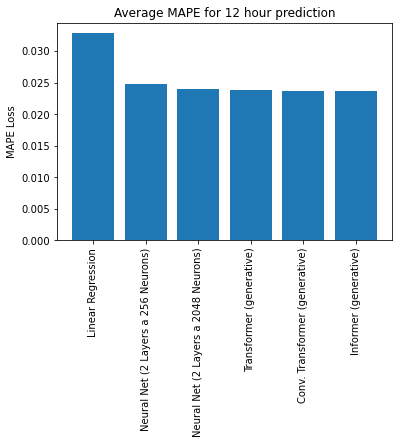

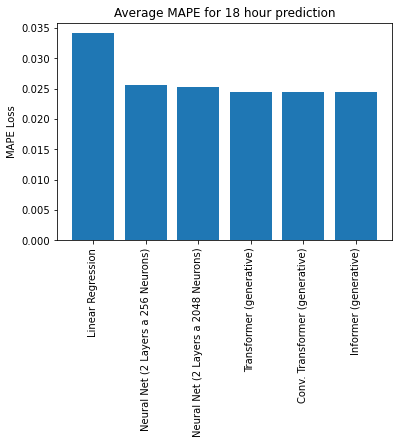

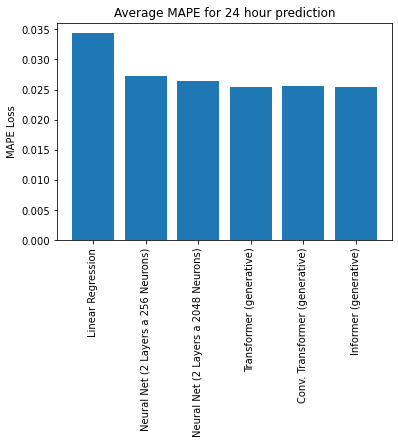

In [191]:
# Compare over all variables
fig = plt.figure()
next_hour_mape_losses = []
mape_losses_6_hours = []
mape_losses_12_hours = []
mape_losses_18_hours = []
mape_losses_24_hours = []
for index, experiment in enumerate(experiments):
    mape_losses_by_predicted_variable = []
    for variable in experiment['evaluation']['mape_losses_by_prediction_variable']:
        mape_loss = experiment['evaluation']['mape_losses_by_prediction_variable'][variable]
        mape_losses_by_predicted_variable.append(mape_loss)
        if variable == '0':
            next_hour_mape_losses.append(mape_loss)
        elif variable == '5':
            mape_losses_6_hours.append(mape_loss)
        elif variable == '11':
            mape_losses_12_hours.append(mape_loss)
        elif variable == '17':
            mape_losses_18_hours.append(mape_loss)
        elif variable == '23':
            mape_losses_24_hours.append(mape_loss)
    plt.plot(mape_losses_by_predicted_variable, label=labels[index])
plt.xlabel('Prediction Variables')
plt.ylabel('MAPE')
plt.legend(loc='lower right')
plt.show()

# Compare over single variables
create_loss_comparison_diagram(next_hour_mape_losses, 'MAPE for next hour prediction', labels, 'MAPE Loss')
create_loss_comparison_diagram(mape_losses_6_hours, 'Average MAPE for 6 hour prediction', labels, 'MAPE Loss')
create_loss_comparison_diagram(mape_losses_12_hours, 'Average MAPE for 12 hour prediction', labels, 'MAPE Loss')
create_loss_comparison_diagram(mape_losses_18_hours, 'Average MAPE for 18 hour prediction', labels, 'MAPE Loss')
create_loss_comparison_diagram(mape_losses_24_hours, 'Average MAPE for 24 hour prediction', labels, 'MAPE Loss')


Show the training processes:

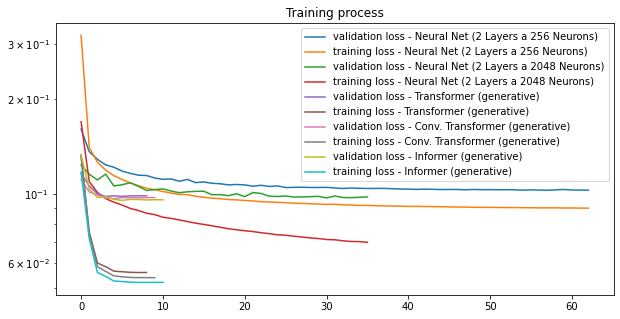

In [192]:
fig = plt.figure(figsize=(10, 5))
for index, experiment in enumerate(experiments):
    if 'trainingReport' in experiment and experiment['trainingReport']:
        epochs = experiment['trainingReport']['epochs']
        validation_losses = [epoch['validationLoss'] for epoch in epochs]
        training_losses = [epoch['trainingLoss'] for epoch in epochs]
        name = labels[index]
        plt.plot(validation_losses, label='validation loss - ' + name)
        plt.plot(training_losses, label='training loss - ' + name)
        plt.legend(loc='upper right')
        plt.yscale('log')
        plt.title('Training process')
plt.show()